In [69]:
#code from: 
#https://medium.com/web-mining-is688-spring-2021/how-influencers-on-reddit-form-a-network-of-related-subreddits-30884134c137
!pip install psaw

In [70]:
import pandas as pd
pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 50)

import numpy as np 
import matplotlib.pyplot as plt #for basic visualizations
import networkx as nx #to create Network Graphs

In [71]:
from psaw import PushshiftAPI

# Initialize PushShift
api = PushshiftAPI()

In [72]:
#change dates and seach term

import datetime as dt

start_epoch=int(dt.datetime(2015, 1, 1).timestamp())
end_epoch=int(dt.datetime(2021, 8, 10).timestamp())

api_request_generator = api.search_submissions(q='(Tampon Tax)', after = start_epoch, before=end_epoch)

In [73]:
Reddit_submissions = pd.DataFrame([submission.d_ for submission in api_request_generator])

/Users/rebeccakrisel/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)
/Users/rebeccakrisel/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/Users/rebeccakrisel/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


In [74]:
Reddit_submissions.shape

(1601, 97)

In [75]:
Reddit_submissions.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_created_from_ads_ui', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_css_class', 'link_flair_richtext', 'link_flair_template_id',
       'link_flair_text', 'link_flair_text_color', 'link_flair_type', 'locked',
       'media_only', 'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'post_hint',
       'preview', 'pwls', 'retrieved_on', 'score', 'selftext', 'send_replies',
       'spoiler', 'stickied', 'subreddit', 'subre

In [76]:
Reddit_submissions[['title', 'score']].sample(10)

,title,score
544,"/u/nidrach on Around the world, activists are campaigning for menstrual dignity: despite the fact that sanitary products are a necessity and not a luxury, half of the countries in the European Union apply a so-called ‘Tampon Tax’ (a VAT levy at the same rate as tobacco, beer and wine)",1
645,Difference between sales tax and VAT?,1
514,"/u/4Rq3CjUUctTT on Around the world, activists are campaigning for menstrual dignity: despite the fact that sanitary products are a necessity and not a luxury, half of the countries in the European Union apply a so-called ‘Tampon Tax’ (a VAT levy at the same rate as tobacco, beer and wine)",1
93,"UK: Tampon tax abolished from today (January 1, 2021)",1
291,"/u/TheReverend403 on Germany scraps 'tampon tax,' as menstrual products not a 'luxury' - Menstrual products have long been taxed at a higher rate in Germany than many other everyday necessities — a form of discrimination, say activists. Even goldfish and cut flowers benefit from a lower VAT.",1
637,There is a real need to address how America views menstruation,5
1298,New York set to repeal 'tampon tax',1
308,"/u/TheReverend403 on Germany scraps 'tampon tax,' as menstrual products not a 'luxury' - Menstrual products have long been taxed at a higher rate in Germany than many other everyday necessities — a form of discrimination, say activists. Even goldfish and cut flowers benefit from a lower VAT.",1
548,"/u/btag2000 on Around the world, activists are campaigning for menstrual dignity: despite the fact that sanitary products are a necessity and not a luxury, half of the countries in the European Union apply a so-called ‘Tampon Tax’ (a VAT levy at the same rate as tobacco, beer and wine)",1
589,"/u/lorarc on Around the world, activists are campaigning for menstrual dignity: despite the fact that sanitary products are a necessity and not a luxury, half of the countries in the European Union apply a so-called ‘Tampon Tax’ (a VAT levy at the same rate as tobacco, beer and wine)",1


In [77]:
Reddit_submissions['date'] = pd.to_datetime(Reddit_submissions['created_utc'], utc=True, unit='s')

In [78]:
Reddit_submissions[['id','date','title', 'selftext', 'author', 'score','upvote_ratio' ,'num_comments', 'subreddit']]

,id,date,title,selftext,author,score,upvote_ratio,num_comments,subreddit
0,ouksht,2021-07-30 13:39:57+00:00,Tampons/pads/menstrual cups,"I would like to address period poverty by providing period products and advocating for awareness.\n\n""Close to 12 million women across the U.S. aged between 12 to 52 live below poverty line, and most of them don't have access to sanitary pads. Currently, neither tampons or pads are available through government assistance programs like SNAP or Medicaid."" The preceding statistic likely does not include ""the large spectrum of trans and non binary people who also menstruate, who continue to be m...",trifletruffles,1,1.0,26,Assistance
1,opc841,2021-07-22 11:49:28+00:00,Thailand imposes tampon tax,[removed],n_Jee,1,1.0,5,Feminism
2,olusg8,2021-07-17 01:36:10+00:00,You Know What Angers Me?: The Period Tax,"This is the tax that is tacked on to feminine hygiene products because in many countries tampons, pads, that sort of thing are considered a luxury rather than a necessity which it is. Taxing the very things that a woman needs during her time of the month is like having to pay a 200% mark-up for toilet paper just because it's made from Japanese trees. [This is actually real by the way](https://www.odditycentral.com/news/fit-for-a-royal-behind-hanebisho-the-worlds-most-expensive-toilet-paper-t...",tharealbigjc22,1,1.0,7,rant
3,olhbcn,2021-07-16 13:54:49+00:00,Tampons/pads/menstrual cups,"I would like to address period poverty by providing period products and advocating for awareness.\n\n""Close to 12 million women across the U.S. aged between 12 to 52 live below poverty line, and most of them don't have access to sanitary pads. Currently, neither tampons or pads are available through government assistance programs like SNAP or Medicaid."" The preceding statistic likely does not include ""the large spectrum of trans and non binary people who also menstruate, who continue to be m...",trifletruffles,1,1.0,82,Assistance
4,od4vkl,2021-07-03 19:41:04+00:00,Aria fresca da Bruxelles: accesso all’aborto come diritto umano ed eliminazione della tampon tax - Possibile,,Ominous_Koreageek,1,1.0,0,king_of_the_south
...,...,...,...,...,...,...,...,...,...
1596,30oae2,2015-03-29 05:07:47+00:00,I think my husband did something to one of our twins: CONCLUSION-1,"Now that the investigation is over...as promised, here is the conclusion of what happened. Reddit won't let me post the whole thing at once, so here's the 1st part\n\n[Part One] (http://www.reddit.com/r/nosleep/comments/2ssxjr/i_think_my_husband_did_something_to_one_of_our/)\n\n[Part Two] (http://www.reddit.com/r/nosleep/comments/2swn5i/i_think_my_husband_did_something_to_one_of_our/)\n\n[Part Three] (http://www.reddit.com/r/nosleep/comments/2t0uep/i_think_my_husband_did_something_to_one_of_...",QueenAnneBoleynTudor,394,NaN,81,nosleep
1597,2zk1tj,2015-03-19 05:24:05+00:00,"CMV: Taxing Tampons/Pads in Canada should continue, because of a myriad of costs related to disposal and clean-up, and that they're in-fact a convenience.","Alright, I realize there has been a previous thread in regards to this topic, but I didn't find it convincing enough to CMV, thus I find myself posting this. \n\nIn the past and today, alternatives exist to the disposable tampon/hygiene pad, which incur a lower cost and are environmentally friendly. The widespread habit of flushing disposable pads/tampons down toilets costs municipalities upwards of millions of dollars, already far more than the products bring in tax revenue.\n\n While not s...",LARPeasant,1,NaN,49,changemyview
1598,2ywdqx,2015-03-13 11:10:40+00:00,Women bleed. Then pay tax on it. But we can stop this Bloody Disgrace.,"This may need explaining.\nWomen bleed once a month. And then pay tax on the products they need to manage the blood. Because, to most governments, menstrual hygiene products are considered non-essential goods, a proverbial “luxury”.\nDidn’t know this? Yes, it’s true.\nI’m part of a team that is launchi

In [79]:
Reddit_df=Reddit_submissions[['id', 'date', 'title', 'selftext', 'author', 'score','upvote_ratio' ,'num_comments', 'subreddit']]

In [80]:
Reddit_df

,id,date,title,selftext,author,score,upvote_ratio,num_comments,subreddit
0,ouksht,2021-07-30 13:39:57+00:00,Tampons/pads/menstrual cups,"I would like to address period poverty by providing period products and advocating for awareness.\n\n""Close to 12 million women across the U.S. aged between 12 to 52 live below poverty line, and most of them don't have access to sanitary pads. Currently, neither tampons or pads are available through government assistance programs like SNAP or Medicaid."" The preceding statistic likely does not include ""the large spectrum of trans and non binary people who also menstruate, who continue to be m...",trifletruffles,1,1.0,26,Assistance
1,opc841,2021-07-22 11:49:28+00:00,Thailand imposes tampon tax,[removed],n_Jee,1,1.0,5,Feminism
2,olusg8,2021-07-17 01:36:10+00:00,You Know What Angers Me?: The Period Tax,"This is the tax that is tacked on to feminine hygiene products because in many countries tampons, pads, that sort of thing are considered a luxury rather than a necessity which it is. Taxing the very things that a woman needs during her time of the month is like having to pay a 200% mark-up for toilet paper just because it's made from Japanese trees. [This is actually real by the way](https://www.odditycentral.com/news/fit-for-a-royal-behind-hanebisho-the-worlds-most-expensive-toilet-paper-t...",tharealbigjc22,1,1.0,7,rant
3,olhbcn,2021-07-16 13:54:49+00:00,Tampons/pads/menstrual cups,"I would like to address period poverty by providing period products and advocating for awareness.\n\n""Close to 12 million women across the U.S. aged between 12 to 52 live below poverty line, and most of them don't have access to sanitary pads. Currently, neither tampons or pads are available through government assistance programs like SNAP or Medicaid."" The preceding statistic likely does not include ""the large spectrum of trans and non binary people who also menstruate, who continue to be m...",trifletruffles,1,1.0,82,Assistance
4,od4vkl,2021-07-03 19:41:04+00:00,Aria fresca da Bruxelles: accesso all’aborto come diritto umano ed eliminazione della tampon tax - Possibile,,Ominous_Koreageek,1,1.0,0,king_of_the_south
...,...,...,...,...,...,...,...,...,...
1596,30oae2,2015-03-29 05:07:47+00:00,I think my husband did something to one of our twins: CONCLUSION-1,"Now that the investigation is over...as promised, here is the conclusion of what happened. Reddit won't let me post the whole thing at once, so here's the 1st part\n\n[Part One] (http://www.reddit.com/r/nosleep/comments/2ssxjr/i_think_my_husband_did_something_to_one_of_our/)\n\n[Part Two] (http://www.reddit.com/r/nosleep/comments/2swn5i/i_think_my_husband_did_something_to_one_of_our/)\n\n[Part Three] (http://www.reddit.com/r/nosleep/comments/2t0uep/i_think_my_husband_did_something_to_one_of_...",QueenAnneBoleynTudor,394,NaN,81,nosleep
1597,2zk1tj,2015-03-19 05:24:05+00:00,"CMV: Taxing Tampons/Pads in Canada should continue, because of a myriad of costs related to disposal and clean-up, and that they're in-fact a convenience.","Alright, I realize there has been a previous thread in regards to this topic, but I didn't find it convincing enough to CMV, thus I find myself posting this. \n\nIn the past and today, alternatives exist to the disposable tampon/hygiene pad, which incur a lower cost and are environmentally friendly. The widespread habit of flushing disposable pads/tampons down toilets costs municipalities upwards of millions of dollars, already far more than the products bring in tax revenue.\n\n While not s...",LARPeasant,1,NaN,49,changemyview
1598,2ywdqx,2015-03-13 11:10:40+00:00,Women bleed. Then pay tax on it. But we can stop this Bloody Disgrace.,"This may need explaining.\nWomen bleed once a month. And then pay tax on the products they need to manage the blood. Because, to most governments, menstrual hygiene products are considered non-essential goods, a proverbial “luxury”.\nDidn’t know this? Yes, it’s true.\nI’m part of a team that is launchi

In [81]:
Reddit_df[Reddit_df.duplicated(keep=False)]

,id,date,title,selftext,author,score,upvote_ratio,num_comments,subreddit


In [82]:
Reddit_df=Reddit_df[Reddit_df['title'].str.lower().str.contains('canada')==False]
Reddit_df=Reddit_df[Reddit_df['selftext'].str.lower().str.contains('canada')==False]
Reddit_df=Reddit_df[Reddit_df['title'].str.lower().str.contains('ukip')==False]
Reddit_df=Reddit_df[Reddit_df['selftext'].str.lower().str.contains('ukip')==False]
Reddit_df=Reddit_df[Reddit_df['title'].str.lower().str.contains('uk')==False]
Reddit_df=Reddit_df[Reddit_df['selftext'].str.lower().str.contains('uk')==False]
Reddit_df=Reddit_df[Reddit_df['title'].str.lower().str.contains('thailand')==False]
Reddit_df=Reddit_df[Reddit_df['selftext'].str.lower().str.contains('thailand')==False]
Reddit_df=Reddit_df[Reddit_df['title'].str.lower().str.contains('ita')==False]
Reddit_df=Reddit_df[Reddit_df['selftext'].str.lower().str.contains('ita')==False]
Reddit_df=Reddit_df[Reddit_df['title'].str.lower().str.contains('Eu')==False]
Reddit_df=Reddit_df[Reddit_df['selftext'].str.lower().str.contains('Eu')==False]
Reddit_df=Reddit_df[Reddit_df['title'].str.lower().str.contains('bruxelles')==False]
Reddit_df=Reddit_df[Reddit_df['subreddit'].str.lower().str.contains('canada')==False]
Reddit_df=Reddit_df[Reddit_df['title'].str.lower().str.contains('labor')==False]

In [83]:
#petition
petition_filter=Reddit_df[Reddit_df['title'].str.lower().str.contains('petition')]
#change filename
petition_filter.to_csv("tampontax_Reddit_petition.csv", encoding='utf-8', index=True)

#sign
sign_filter=Reddit_df[Reddit_df['title'].str.lower().str.contains('sign')]
#change filename
sign_filter.to_csv("tampontax_Reddit_sign.csv", encoding='utf-8', index=True)


#vote
vote_filter=Reddit_df[Reddit_df['title'].str.lower().str.contains('vote')]
#change filename
vote_filter.to_csv("tampontax_Reddit_vote.csv", encoding='utf-8', index=True)


#call
call_filter=Reddit_df[Reddit_df['title'].str.lower().str.contains('call')]
#change filename
call_filter.to_csv("tampontax_Reddit_call.csv", encoding='utf-8', index=True)

#march
march_filter=Reddit_df[Reddit_df['title'].str.lower().str.contains('march')]
#change filename
march_filter.to_csv("tampontax_Reddit_march.csv", encoding='utf-8', index=True)

#representative
representative_filter=Reddit_df[Reddit_df['title'].str.lower().str.contains('representative')]
#change filename
representative_filter.to_csv("tampontax_Reddit_representative.csv", encoding='utf-8', index=True)

#gov
gov_filter=Reddit_df[Reddit_df['title'].str.lower().str.contains('gov')]
#change filename
gov_filter.to_csv("tampontax_Reddit_gov.csv", encoding='utf-8', index=True)


#demand
demand_filter=Reddit_df[Reddit_df['title'].str.lower().str.contains('demand')]
#change filename
demand_filter.to_csv("tampontax_Reddit_demand.csv", encoding='utf-8', index=True)

In [84]:
import pandas as pd
pd.options.display.max_rows = 100

#replace all file names/paths
call_df=pd.read_csv('tampontax_Reddit_call.csv', delimiter=',', encoding='utf-8')
demand_df=pd.read_csv('tampontax_Reddit_demand.csv', delimiter=',', encoding='utf-8')
gov_df=pd.read_csv('tampontax_Reddit_gov.csv', delimiter=',', encoding='utf-8')
march_df=pd.read_csv('tampontax_Reddit_march.csv', delimiter=',', encoding='utf-8')
petition_df=pd.read_csv('tampontax_Reddit_petition.csv', delimiter=',', encoding='utf-8')
representative_df=pd.read_csv('tampontax_Reddit_representative.csv', delimiter=',', encoding='utf-8')
sign_df=pd.read_csv('tampontax_Reddit_sign.csv', delimiter=',', encoding='utf-8')
vote_df=pd.read_csv('tampontax_Reddit_vote.csv', delimiter=',', encoding='utf-8')

frames=[call_df, demand_df, gov_df, march_df, petition_df, representative_df, sign_df, vote_df]

political_df = pd.concat(frames)

political_df.reset_index(inplace=True)

political_df=political_df.sort_values(by='date', ascending=True)


#replace file name
political_df.to_csv("tampontax_Reddit_political.csv", encoding='utf-8', index=False)
political_df.to_json("tampontax_Reddit_political.json", index=True, orient='columns')


political_df

,index,Unnamed: 0,id,date,title,selftext,author,score,upvote_ratio,num_comments,subreddit
83,9,1575,37aba6,2015-05-26 03:40:32+00:00,‘Stop Taxing My Period!’ Online Petition To Cut Australian Tampon Sales Tax Caught The Attention Of Australia’s Federal Treasurer,NaN,rotoreuters,1,NaN,0,betternews
82,8,1573,37cwez,2015-05-26 18:30:23+00:00,Thousands Of Women Sign Petition Against The 'Tampon Tax',NaN,drewiepoodle,31,NaN,35,TwoXChromosomes
104,20,1573,37cwez,2015-05-26 18:30:23+00:00,Thousands Of Women Sign Petition Against The 'Tampon Tax',NaN,drewiepoodle,31,NaN,35,TwoXChromosomes
81,7,1571,37d6re,2015-05-26 19:38:56+00:00,Thousands Of Aussie Women Sign Petition Against The 'Tampon Tax',NaN,epiphanot,1,NaN,0,news
103,19,1571,37d6re,2015-05-26 19:38:56+00:00,Thousands Of Aussie Women Sign Petition Against The 'Tampon Tax',NaN,epiphanot,1,NaN,0,news
...,...,...,...,...,...,...,...,...,...,...,...
86,2,173,gd0ujj,2020-05-03 23:46:28+00:00,PLEASE SIGN THIS PETITION TO REMOVE THE TAMPON TAX IN MICHIGAN!,"Hi everyone! I am currently working with PERIOD (a national organization that works to fight menstrual stigma, period poverty, and more through education, service, and advocacy) to remove the tampon tax in Michigan and it would be amazing if you all could sign this petition: https://actionnetwork.org/petitions/end-tampon-tax-michigan. It holds more power if you are a Michigan resident, but any signatures at all would be appreciated! Also, there are many other petitions going around for other...",ygenluryak,1,1.0,0,Periods
85,1,172,gd0w0f,2020-05-03 23:49:07+00:00,PLEASE SIGN THIS PETITION TO REMOVE THE TAMPON TAX IN MICHIGAN!,"Hi everyone! I am currently working with PERIOD (a national organization that works to fight menstrual stigma, period poverty, and more through education, service, and advocacy) to remove the tampon tax in Michigan and it would be amazing if you all could sign this petition: https://actionnetwork.org/petitions/end-tampon-tax-michigan. It holds more power if you are a Michigan resident, but any signatures at all would be appreciated! Also, there are many other petitions going around for other...",ygenluryak,1,1.0,0,menstruation
74,0,172,gd0w0f,2020-05-03 23:49:07+00:00,PLEASE SIGN THIS PETITION TO REMOVE THE TAMPON TAX IN MICHIGAN!,"Hi everyone! I am currently working with PERIOD (a national organization that works to fight menstrual stigma, period poverty, and more through education, service, and advocacy) to remove the tampon tax in Michigan and it would be amazing if you all could sign this petition: https://actionnetwork.org/petitions/end-tampon-tax-michigan. It holds more power if you are a Michigan resident, but any signatures at all would be appreciated! Also, there are many other petitions going around for other...",ygenluryak,1,1.0,0,menstruation
84,0,71,koonjs,2021-01-02 02:17:25+00:00,"Period products no longer classed as “luxury, non-essential items” and taxed 5% from New Years Day onwards. Activists campaigning to overhaul so-called tampon tax for years, said change signals end to “sexist” taxation policy which has been in place since 1973.",NaN,honolulu_oahu_mod,1,1.0,52,worldnews


In [85]:
#clean your date
#change filename
political_clean_df = pd.read_csv('tampontax_Reddit_political_clean.csv', delimiter=",")

In [86]:
political_clean_df

,index,Unnamed: 0,author,date,title,selftext,url,subreddit,score,num_comments,num_crossposts,count
0,20,1573.0,drewiepoodle,2015-05-26 18:30:23+00:00,Thousands Of Women Sign Petition Against The 'Tampon Tax',NaN,http://thinkprogress.org/health/2015/05/26/3662624/australia-tampon-tax/,TwoXChromosomes,31,35,NaN,NaN
1,20,NaN,drewiepoodle,2015-05-26 18:30:23+00:00,Thousands Of Women Sign Petition Against The 'Tampon Tax',NaN,http://thinkprogress.org/health/2015/05/26/3662624/australia-tampon-tax/,TwoXChromosomes,31,35,NaN,1.0
2,24,1397.0,pnoque,2016-02-11 02:41:30+00:00,So-called 'Tampon tax' exemption defeated,NaN,http://www.sltrib.com/news/3524704-155/so-called-tampon-tax-exemption-defeated,Utahpolitics,6,1,NaN,NaN
3,32,1395.0,anutensil,2016-02-12 15:01:22+00:00,Utah Officials Vote to Keep the Tampon Tax,NaN,http://jezebel.com/utah-officials-vote-to-keep-the-tampon-tax-1758659636,women,29,0,NaN,NaN
4,32,1395.0,anutensil,2016-02-12 15:01:22+00:00,Utah Officials Vote to Keep the Tampon Tax,NaN,http://jezebel.com/utah-officials-vote-to-keep-the-tampon-tax-1758659636,women,29,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
151,1,NaN,ygenluryak,2020-05-03 23:49:07+00:00,PLEASE SIGN THIS PETITION TO REMOVE THE TAMPON TAX IN MICHIGAN!,"Hi everyone! I am currently working with PERIOD (a national organization that works to fight menstrual stigma, period poverty, and more through education, service, and advocacy) to remove the tampon tax in Michigan and it would be amazing if you all could sign this petition: https://actionnetwork.org/petitions/end-tampon-tax-michigan. It holds more power if you are a Michigan resident, but any signatures at all would be appreciated! Also, there are many other petitions going around for other...",https://www.reddit.com/r/menstruation/comments/gd0w0f/please_sign_this_petition_to_remove_the_tampon/,menstruation,1,0,0.0,1.0
152,1,172.0,ygenluryak,2020-05-03 23:49:07+00:00,PLEASE SIGN THIS PETITION TO REMOVE THE TAMPON TAX IN MICHIGAN!,"Hi everyone! I am currently working with PERIOD (a national organization that works to fight menstrual stigma, period poverty, and more through education, service, and advocacy) to remove the tampon tax in Michigan and it would be amazing if you all could sign this petition: https://actionnetwork.org/petitions/end-tampon-tax-michigan. It holds more power if you are a Michigan resident, but any signatures at all would be appreciated! Also, there are many other petitions going around for other...",https://www.reddit.com/r/menstruation/comments/gd0w0f/please_sign_this_petition_to_remove_the_tampon/,menstruation,1,0,0.0,NaN
153,0,71.0,honolulu_oahu_mod,2021-01-02 02:17:25+00:00,"Period products no longer classed as “luxury, non-essential items” and taxed 5% from New Years Day onwards. Activists campaigning to overhaul so-called tampon tax for years, said change signals end to “sexist” taxation policy which has been in place since 1973.",NaN,https://www.independent.co.uk/news/uk/home-news/tampon-tax-period-products-b1780953.html,worldnews,1,52,0.0,NaN
154,0,NaN,honolulu_oahu_mod,2021-01-02 02:17:25+00:00,"Period products no longer classed as “luxury, non-essential items” and taxed 5% from New Years Day onwards. Activists campaigning to overhaul so-called tampon tax for years, said change signals end to “sexist” taxation policy which has been in place since 1973.",NaN,https://www.independent.co.uk/news/uk/home-news/tampon-tax-period-products-b1780953.html,worldnews,1,52,0.0,1.0


In [87]:
# Convert the date column to datetime values
political_clean_df['date'] = pd.to_datetime(political_clean_df['date'])

In [92]:
freq_authors = political_clean_df[political_clean_df.duplicated(['author'], keep = False)]

In [93]:
freq_authors = freq_authors[freq_authors.author != 'None']

In [94]:
freq_authors.author.nunique

<bound method IndexOpsMixin.nunique of 0           drewiepoodle
1           drewiepoodle
3              anutensil
4              anutensil
5              anutensil
             ...        
151           ygenluryak
152           ygenluryak
153    honolulu_oahu_mod
154    honolulu_oahu_mod
155    honolulu_oahu_mod
Name: author, Length: 150, dtype: object>

Text(0, 0.5, 'Number of posts')

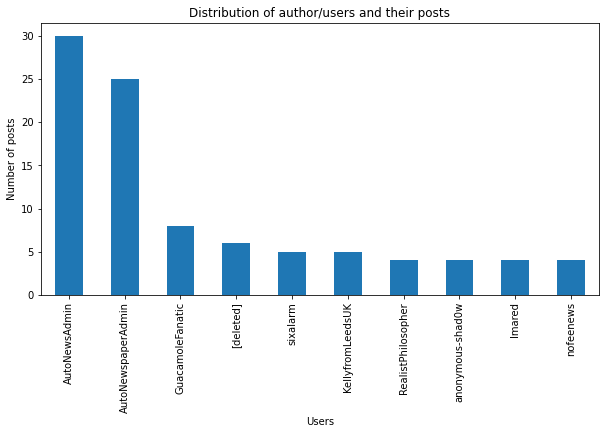

In [95]:
plt.figure(figsize=(10, 5))
ax = freq_authors['author'].value_counts()[:10].plot(kind='bar',title='Distribution of author/users and their posts')
ax.set_xlabel("Users")
ax.set_ylabel("Number of posts")

In [96]:
authors_lst = list(freq_authors.author.unique())

In [98]:
nx_df=political_clean_df[['author','subreddit']]

In [100]:
nx_df.head()

,author,subreddit
0,drewiepoodle,TwoXChromosomes
1,drewiepoodle,TwoXChromosomes
2,pnoque,Utahpolitics
3,anutensil,women
4,anutensil,women


In [101]:
g = nx.from_pandas_edgelist(nx_df, source='author', target='subreddit')

In [102]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 70
Number of edges: 44
Average degree:   1.2571


In [103]:
#Degree centrality
centrality=nx.degree_centrality(g)
[(x,centrality[x]) for x in sorted (centrality, key=centrality.get , reverse=True)[:10]]

[('AutoNewsAdmin', 0.07246376811594203),
 ('women', 0.043478260869565216),
 ('GuacamoleFanatic', 0.043478260869565216),
 ('TwoXChromosomes', 0.028985507246376812),
 ('[deleted]', 0.028985507246376812),
 ('KellyfromLeedsUK', 0.028985507246376812),
 ('Feminism', 0.028985507246376812),
 ('3novices', 0.028985507246376812),
 ('nofeenews', 0.028985507246376812),
 ('shallah', 0.028985507246376812)]

In [104]:
#closeness centrality
centrality=nx.closeness_centrality(g)
[(x,centrality[x]) for x in sorted (centrality, key=centrality.get , reverse=True)[:10]]

[('AutoNewsAdmin', 0.07246376811594203),
 ('women', 0.0463768115942029),
 ('GuacamoleFanatic', 0.0463768115942029),
 ('SLTRIBauto', 0.04025764895330113),
 ('MIAMIHERALDauto', 0.04025764895330113),
 ('TWTauto', 0.04025764895330113),
 ('GUARDIANauto', 0.04025764895330113),
 ('FOXauto', 0.04025764895330113),
 ('TwoXChromosomes', 0.03864734299516908),
 ('shallah', 0.03864734299516908)]

In [105]:
#Betweenness centrality
centrality=nx.betweenness_centrality(g)
[(x,centrality[x]) for x in sorted (centrality, key=centrality.get , reverse=True)[:10]]

[('AutoNewsAdmin', 0.004262574595055414),
 ('women', 0.002131287297527707),
 ('GuacamoleFanatic', 0.002131287297527707),
 ('TwoXChromosomes', 0.001278772378516624),
 ('shallah', 0.001278772378516624),
 ('[deleted]', 0.0008525149190110827),
 ('Feminism', 0.0008525149190110827),
 ('KellyfromLeedsUK', 0.00042625745950554135),
 ('Denver', 0.00042625745950554135),
 ('ygenluryak', 0.00042625745950554135)]

In [106]:
#eigenvector centrality
centrality=nx.eigenvector_centrality(g)
[(x,centrality[x]) for x in sorted (centrality, key=centrality.get , reverse=True)[:10]]

[('AutoNewsAdmin', 0.7071067731587128),
 ('SLTRIBauto', 0.3162277624266812),
 ('MIAMIHERALDauto', 0.3162277624266812),
 ('TWTauto', 0.3162277624266812),
 ('GUARDIANauto', 0.3162277624266812),
 ('FOXauto', 0.3162277624266812),
 ('GuacamoleFanatic', 6.960756916623084e-05),
 ('women', 6.960756916623083e-05),
 ('TwoXChromosomes', 5.3275326974247226e-05),
 ('shallah', 5.327532697424721e-05)]

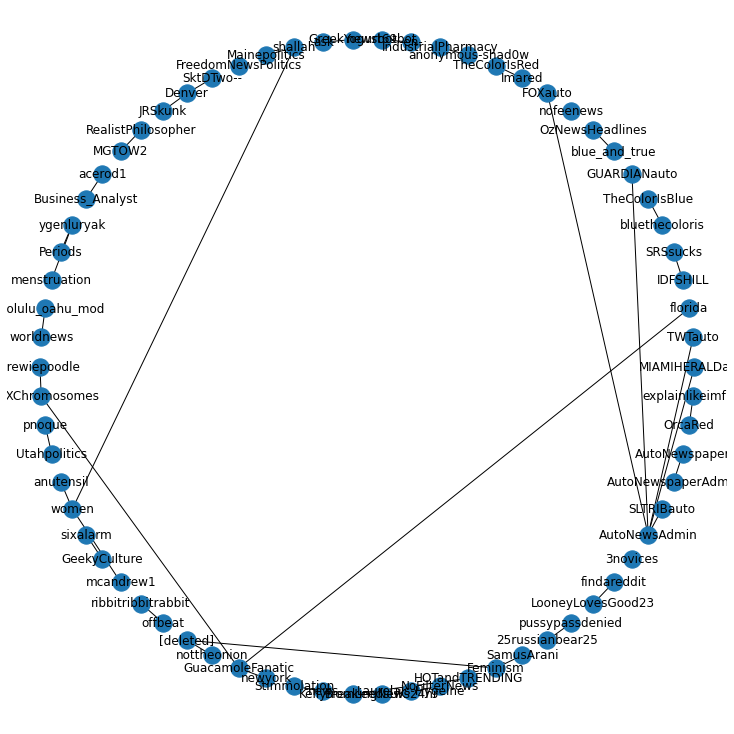

In [107]:
from matplotlib.pyplot import figure
figure(figsize=(10, 10))
nx.draw_shell(g, with_labels=True)

In [108]:
leaderboard = {}
for x in g.nodes:
 leaderboard[x] = len(g[x])
s = pd.Series(leaderboard, name='connections')
df_conn = s.to_frame().sort_values('connections', ascending=False)

In [109]:
df_conn.head()

,connections
AutoNewsAdmin,5
GuacamoleFanatic,3
women,3
shallah,2
Feminism,2


In [111]:
# Create the graph from the dataframe [5]
g = nx.from_pandas_edgelist(nx_df, source='author', target='subreddit')
# Create a layout for nodes 
layout = nx.spring_layout(g,iterations=50,scale=2)

sub_size = [g.degree(sub) * 80 for sub in subs] #multiplying by 80 to get circular size
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=subs, 
                       node_size=sub_size, 
                       node_color='powderblue')
# Draw all the entities 
nx.draw_networkx_nodes(g, layout, nodelist=authors_lst, node_color='green', node_size=100)
# Draw highly connected influencers 
popular_people = [person for person in authors_lst if g.degree(person) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_people, node_color='orange', node_size=100)
nx.draw_networkx_edges(g, layout, width=1, edge_color="lightgreen")
node_labels = dict(zip(subs, subs)) #labels for subs
nx.draw_networkx_labels(g, layout, labels=node_labels)

plt.axis('off')
plt.title("Network Graph of Related Subreddits")
plt.show()

NameError: name 'subs' is not defined